# **Sampling distributions of the mean and variance**

In this notebook I take many random samples from an underlying distribution to show how the observed sample means and observed sample variances differ from their theoretical distributions.

---

Definitions:

- Sample mean: $\bar{x}_i = \frac{\sum x_i}{n}$
- Sample variance: $s^2_i = \frac{S^2_i}{n-1} = \frac{\sum (x_i - \bar{x})^2}{n-1}$

---

The notebook is structured as follows:

1. Take $N$ samples from some normally distributed random variable $X \sim N(\mu, \sigma^2)$
  - Each of the $N$ samples consists of $n$ randomly selected observations ($x_1, x_2, ..., x_{n-1}, x_n$)
3. Calculate
  - Sample Mean for each of the $N$ samples $(\bar{x}_1, \bar{x}_2, ..., \bar{x}_{N-1}, \bar{x}_N)$
  - Unbiased variance for each of the $N$ samples $(s_1^2, s_2^2, ..., s_{N-1}^2, s_{N}^2)$
5. Compare the observed frequency distributions to their theoretical distributions
  1. $\bar{X} \sim N(\mu, \frac{\mu}{n})$
  2. $\frac{S^2}{\sigma} \sim \chi^2_{n-1}$
  3. ${\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}} \sim t_{n-1}$


---

Import libraries

In [1]:
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
import matplotlib.pyplot as plt

# **1. Underlying distribution**

Declare the underlying distribution from which we will be sampling from

$X$ is normally distributed with mean 10 and variance 4

$X \sim N(\mu = 10, \sigma^2 = 4)$

In [2]:
mu_X = 10
var_X = 4
X = norm(loc=mu_X, scale=sqrt(var_X))

Plot the probability distribution of $X$

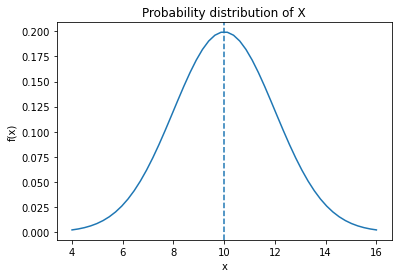

In [3]:
# x-axis
x_ax = np.linspace(start=(mu_X - 3 * sqrt(var_X)), stop=(mu_X + 3 * sqrt(var_X)), num=50, endpoint=True)
# Plot PDF 
plt.plot(x_ax, X.pdf(x=x_ax))
# Plot population mean
plt.axvline(mu_X, linestyle='--')
# Styling
plt.title('Probability distribution of X')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks(ticks=np.arange(x_ax.min(), x_ax.max() + 1, sqrt(var_X)))
# Show
plt.show()

Extract a sample of $n = 10$ observations from $X$ and repeat this 1,000 times.

This way, we will have 1,000 samples, each one of them consisting of 10 randomly selected observations.


In [4]:
n = 10
X_obs = []
for i in range(1000):
  X_obs.append(X.rvs(size=n, random_state=i))

# Visualize the 72nd sample
X_obs[72]

array([10.637091  ,  8.64088113,  5.58322306, 11.18048033, 13.34953209,
        6.66808805,  8.35132253, 11.09052068, 10.00237239,  8.48593896])

# **2. Sample mean and sample variance**

Calculate the mean of each sample in `X_obs`

- We will call this `sm` (for **S**ample **M**ean)

In [5]:
sm = []
for x in X_obs:
  sm.append(x.mean())

# Visualize the 72nd sample mean
sm[72]

9.398945020850137

Calculate the variance of each sample in `X_obs`

- Note: `ddof=1` implies that the denominator in the variance formula will be `n - 1`, which gives us an unbiased estimator

In [6]:
sv = []
for x in X_obs:
  sv.append(x.var(ddof=1))

# Visualize the 72nd sample variance
sv[72]

5.340292462785591

# **3. Compare**

# Distribution of the sample mean

In theory, the sample mean follows a normal distribution:

$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$

In [7]:
# Declare the theoretical random variable
X_bar = norm(loc=mu_X, scale=sqrt(var_X / n))

Let's see how the mean and variance of the 1,000 sample means compare against their theoretical values

In [8]:
print('Observed mean:', round(np.mean(sm), 2))
print('Theoretical mean:', X_bar.stats('m'))
print('\nObserved variance:', round(np.var(sm), 2))
print('Theoretical variance:', round(X_bar.stats('v').item(), 2))

Observed mean: 9.99
Theoretical mean: 10.0

Observed variance: 0.39
Theoretical variance: 0.4


Let's see how the histogram of the 1,000 sample means compares against its theoretical probability distribution

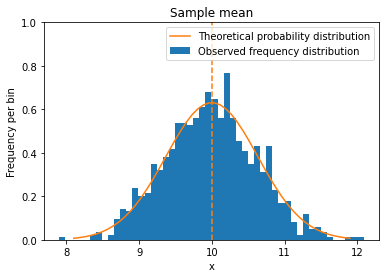

In [9]:
# Set x-axis
x_ax = np.linspace(mu_X- 3 * sqrt(X_bar.stats('v')), mu_X + 3 * sqrt(X_bar.stats('v')))
# Plot histogram of observed sample means
plt.hist(sm, bins=50, density=True, color='C0', label='Observed frequency distribution')
# Plot theoretical distribution
plt.plot(x_ax, X_bar.pdf(x_ax), color='C1', label='Theoretical probability distribution')
# Plot theoretical mean
plt.axvline(X_bar.stats('m').item(), color='C1', ls='--')
# Styling
plt.title('Sample mean')
plt.xlabel('x')
plt.ylabel('Frequency per bin')
plt.legend()
plt.ylim(0, 1)
# Show
plt.show()

# Distribution of the observed sample variance

Recall

$s_i^2 = \frac{S_i^2}{n-1} \implies S_i^2 = s_i^2 \times (n - 1)$

In theory, the sampling distribution of $\frac{S^2}{\sigma} \sim \chi_{n - 1}^2$

For this example:

$\frac{S^2}{\sigma} \sim \chi_{9}^2$

Declare:

1. the theoretical random variable
2. the observed sum of squared deviations divided by the population variance

In [10]:
# Declare the theoretical chi-square distribution
SV = chi2(df=(n - 1))
# Multiply each observed variance times (n - 1) to get sum of squares and divide by the variance of X
est = [v * (n - 1) / var_X for v in sv]

Let's see how the mean and variance of the 1,000 observations compare to their theoretical values

In [11]:
print('Observed mean:', round(np.mean(est), 2))
print('Theoretical mean:', SV.stats('m'))
print('\nObserved variance:', round(np.var(est), 2))
print('Theoretical variance', SV.stats('v'))

Observed mean: 9.06
Theoretical mean: 9.0

Observed variance: 18.18
Theoretical variance 18.0


Let's see how the histogram compares to its theoretical probability distribution

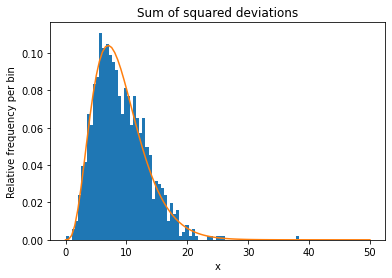

In [12]:
# Set x-axis
x_ax = np.linspace(start=0, stop=50, num=100, endpoint=True)
# Plot histogram of observed sample variances
plt.hist(est, bins=x_ax, density=True, label='Observed frequency distribution')
# Plot theoretical PDF
plt.plot(x_ax, SV.pdf(x=x_ax), label='Theoretical probability distribution')
# Styling
plt.title('Sum of squared deviations')
plt.xlabel('x')
plt.ylabel('Relative frequency per bin')
# Show
plt.show()

# Distribution of the observed $t$ statistic

In theory, the sampling distribution of $T = {\frac{\bar{x}-\mu}{\frac{S}{\sqrt{n}}}}$ follows a $t$ distribution with $n-1$ degrees of freedom.

For this example:

${\frac{\bar{x}-\mu}{\frac{S}{\sqrt{n}}}} \sim t_9$

Declare:

1. the theoretical random variable
2. the observed ${\frac{\bar{x}-\mu}{\frac{S}{\sqrt{n}}}}$, where: $\frac{S}{\sqrt{n}} = \frac{9 sv_i}{\sqrt{10}}$

In [13]:
# Declare the theoretical chi-square distribution
T = t(df=(n - 1))
# Observed t statistics
est = np.multiply(np.array(sm) - mu_X, np.power(np.array(sv) * (n - 1) / n, 0.5))

Let's see how the mean and variance of the 1,000 observations compare to their theoretical values

In [14]:
print('Observed mean:', round(np.mean(est), 2))
print('Theoretical mean:', T.stats('m'))
print('\nObserved variance:', round(np.var(est), 2))
print('Theoretical variance', round(T.stats('v').item(), 2))

Observed mean: -0.02
Theoretical mean: 0.0

Observed variance: 1.39
Theoretical variance 1.29


Let's see how the histogram compares to its theoretical probability distribution

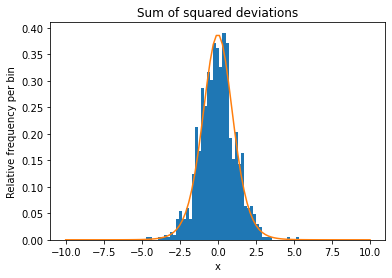

In [15]:
# Set x-axis
x_ax = np.linspace(start=-10, stop=10, num=100, endpoint=True)
# Plot histogram of observed sample variances
plt.hist(est, bins=x_ax, density=True, label='Observed frequency distribution')
# Plot theoretical PDF
plt.plot(x_ax, T.pdf(x=x_ax), label='Theoretical probability distribution')
# Styling
plt.title('Sum of squared deviations')
plt.xlabel('x')
plt.ylabel('Relative frequency per bin')
# Show
plt.show()